Number of channels 1
Sample width 2
Frame rate. <bound method Wave_read.getframerate of <wave.Wave_read object at 0x7fb89b0660a0>>
Number of frames 641051
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=10000, nframes=641051, comptype='NONE', compname='not compressed')


<IPython.core.display.Javascript object>


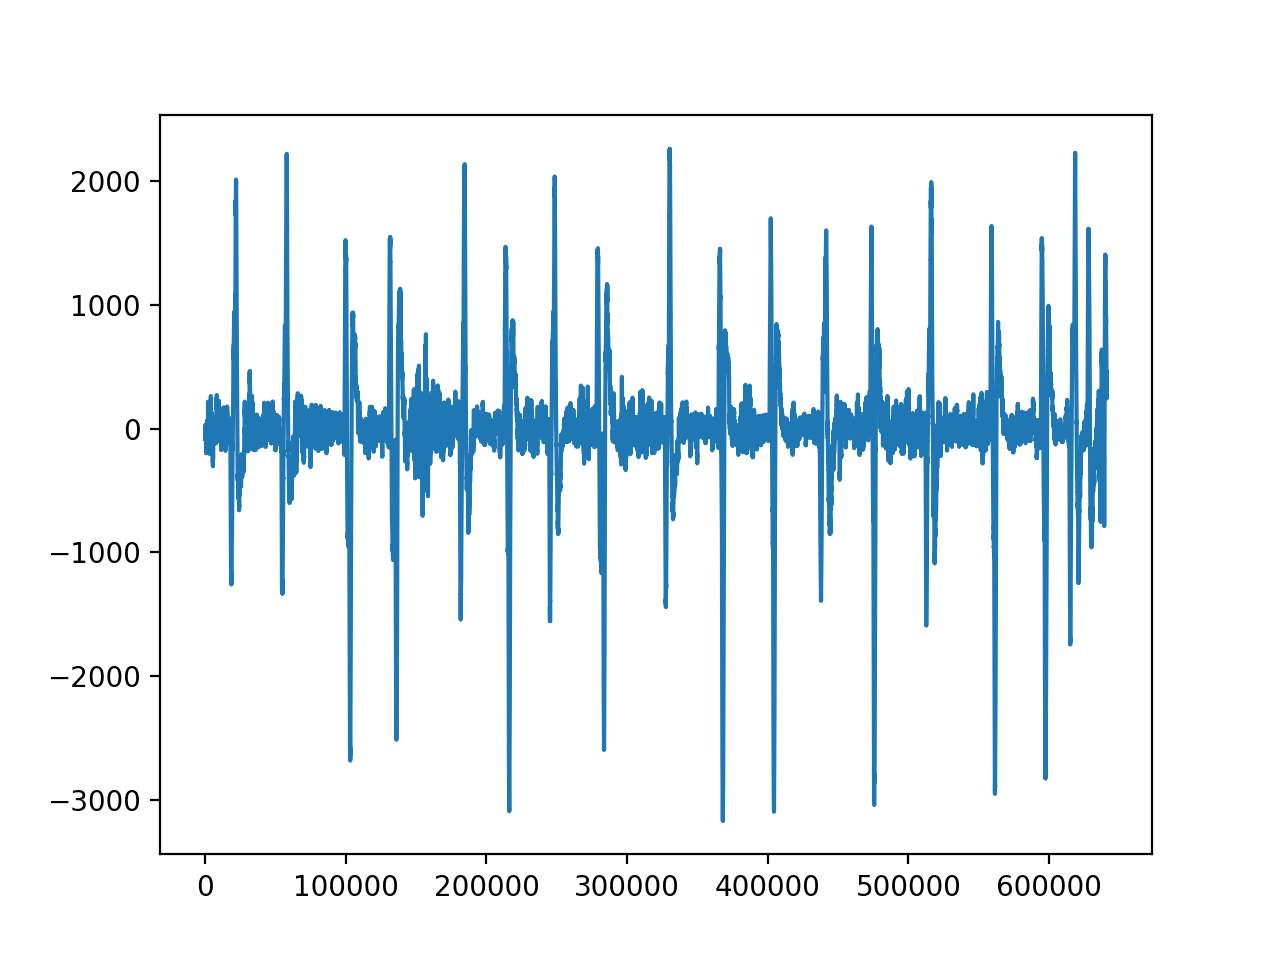

In [6]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fft import fft, fftfreq
import numpy as np
import wave, struct

wav = wave.open('github/Good Data - Sandeep no errors/left-middle-right-middle.wav','r')
print( "Number of channels",wav.getnchannels())
print ( "Sample width",wav.getsampwidth())
print ( "Frame rate.",wav.getframerate)
print ("Number of frames",wav.getnframes())
print ( "parameters:",wav.getparams())


framerate = wav.getframerate()
nframes = wav.getnframes()
        
wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))
test_array = wav_array #[25000:35000]

%matplotlib notebook
plt.plot(test_array)

<IPython.core.display.Javascript object>


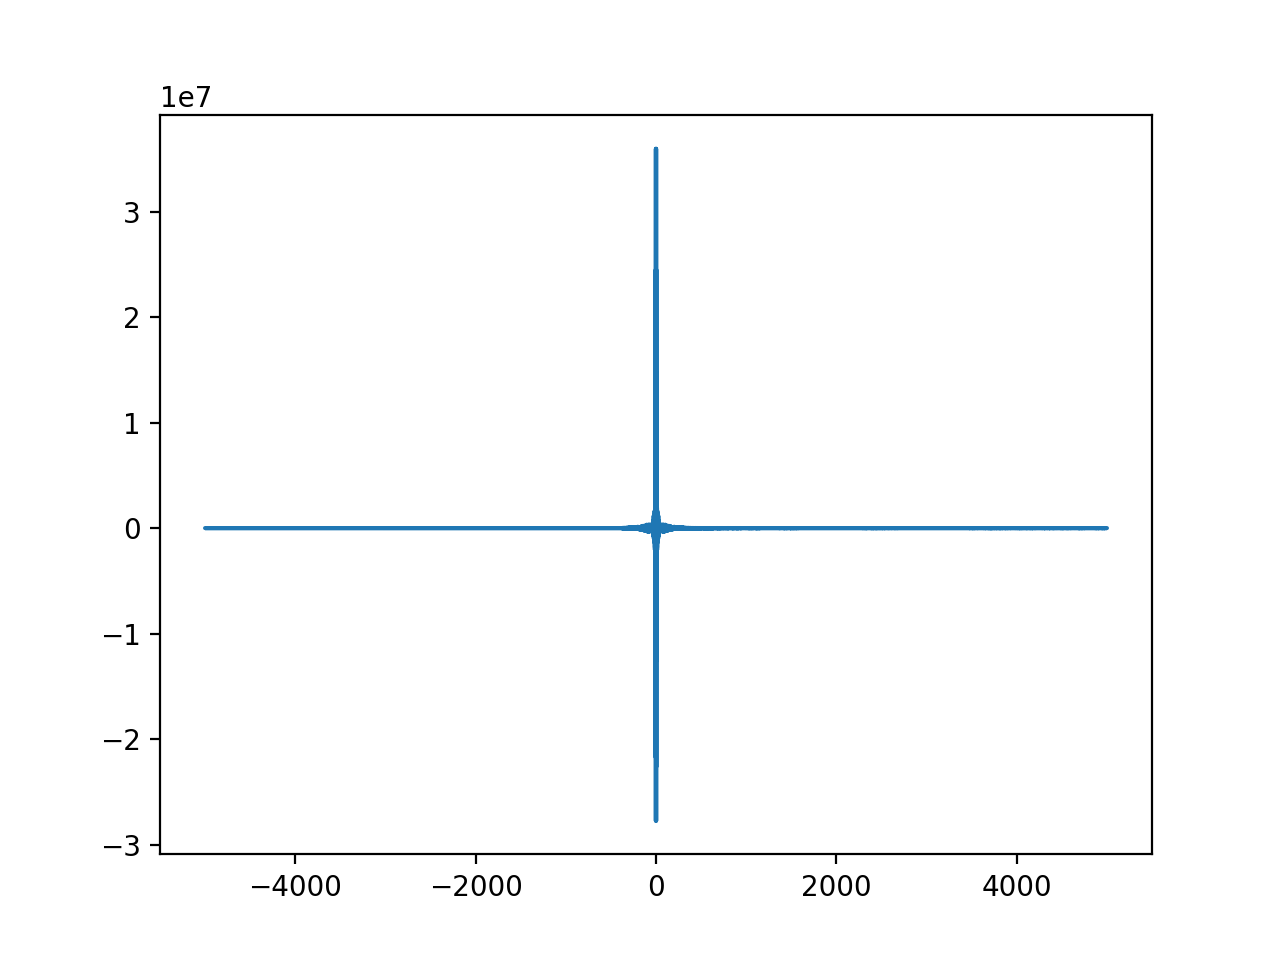

/Users/stephanie/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
fs = framerate
dt = 1/fs
t = np.arange(0, (len(test_array)*dt), dt)

# Num samples
N = len(test_array)
    
yf = fft(test_array)
xf = fftfreq(N, 1/fs)
np.size(xf)
np.size(t)

%matplotlib notebook
plt.plot(xf, yf)

In [8]:
def fourier(arr, samprate):
    f, t, Sxx = signal.spectrogram(arr, samprate)
    

2861
[[  81]
 [  95]
 [  96]
 [  99]
 [ 243]
 [ 256]
 [ 260]
 [ 442]
 [ 448]
 [ 449]
 [ 458]
 [ 461]
 [ 462]
 [ 463]
 [ 584]
 [ 604]
 [ 605]
 [ 609]
 [ 610]
 [ 674]
 [ 676]
 [ 689]
 [ 707]
 [ 809]
 [ 820]
 [ 825]
 [ 958]
 [ 963]
 [ 966]
 [ 967]
 [ 968]
 [1092]
 [1093]
 [1242]
 [1243]
 [1263]
 [1264]
 [1267]
 [1268]
 [1269]
 [1471]
 [1472]
 [1476]
 [1629]
 [1637]
 [1640]
 [1641]
 [1644]
 [1645]
 [1646]
 [1647]
 [1799]
 [1802]
 [1803]
 [1806]
 [1807]
 [1808]
 [1967]
 [2111]
 [2117]
 [2121]
 [2122]
 [2125]
 [2126]
 [2127]
 [2286]
 [2287]
 [2301]
 [2306]
 [2492]
 [2498]
 [2504]
 [2505]
 [2508]
 [2509]
 [2510]
 [2652]
 [2659]
 [2664]
 [2665]
 [2669]
 [2670]
 [2743]
 [2758]
 [2762]
 [2800]
 [2847]
 [2848]
 [2850]
 [2854]
 [2855]]
[[ 1.8272]
 [ 2.1408]
 [ 2.1632]
 [ 2.2304]
 [ 5.456 ]
 [ 5.7472]
 [ 5.8368]
 [ 9.9136]
 [10.048 ]
 [10.0704]
 [10.272 ]
 [10.3392]
 [10.3616]
 [10.384 ]
 [13.0944]
 [13.5424]
 [13.5648]
 [13.6544]
 [13.6768]
 [15.1104]
 [15.1552]
 [15.4464]
 [15.8496]
 [18.1344]
 [

<IPython.core.display.Javascript object>


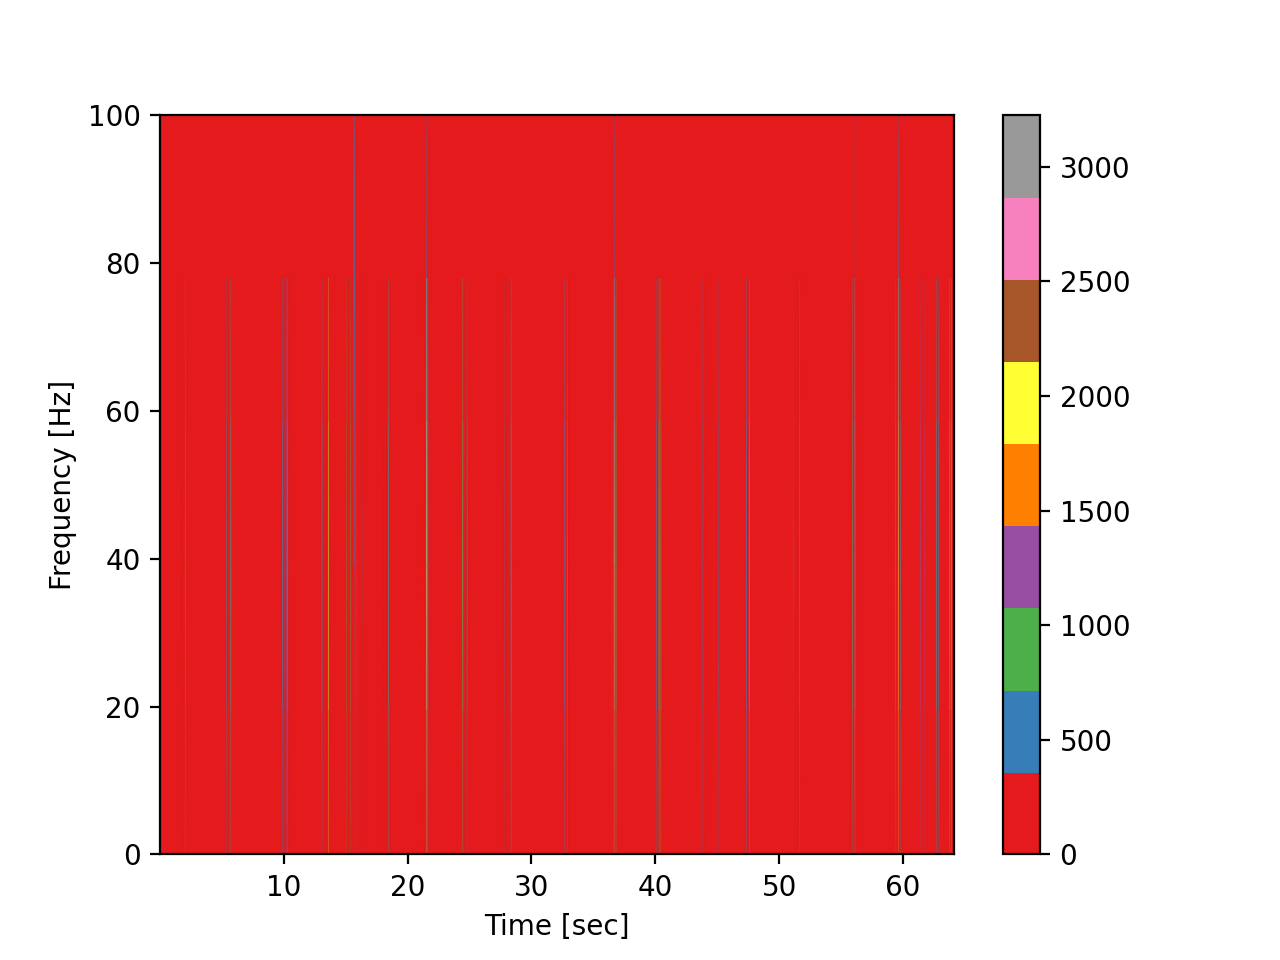

In [9]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

f, t, Sxx = signal.spectrogram(test_array, fs)
maximum = np.max(Sxx)
threshold = maximum/5;

print(len(t))
np.set_printoptions(threshold=np.inf)
# print(np.shape(Sxx))
# print(np.amax(Sxx, 0))
maximum_Freqs = np.amax(Sxx, 0) # max frequency for each time
above_threshold = maximum_Freqs > threshold
indices = np.argwhere(maximum_Freqs > threshold)
print(indices)
print(t[indices])
# time_values = t[indices];

# prev_t = -1
# remove_indices = [];
# for i in indices:
#     if prev_t == -1:
#         prev_t = t[i]
#     elif t[i] == prev_t
#         indices
    

%matplotlib notebook
plt.pcolormesh(t, f, Sxx, cmap ='Set1', shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 100])
plt.show()
plt.colorbar()

In [4]:
from scipy.io.wavfile import read
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import get_window
from math import ceil
from pylab import figure, imshow, clf, gray, xlabel, ylabel

# # Read in a wav file 
# #   returns sample rate (samples / sec) and data
# rate, data = read('github/Good Data - Sandeep no errors/left-middle-right-middle#2.wav')
# data = data[:,0]
# # Define the sample spacing and window size.
# dT = 1.0/rate
# T_window = 50e-3
# N_window = int(T_window * rate)
# N_data = len(data)

wav = wave.open('github/Good Data - Sandeep no errors/left-middle-right-middle#2.wav','r')
print( "Number of channels",wav.getnchannels())
print ( "Sample width",wav.getsampwidth())
print ( "Frame rate.",wav.getframerate)
print ("Number of frames",wav.getnframes())
print ( "parameters:",wav.getparams())


framerate = wav.getframerate()
dT = 1/framerate;
nframes = wav.getnframes()
wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))
T_window = 1;
N_window = int(T_window * rate);

# 1. Get the window profile
window = get_window('hamming', N_window)

# 2. Set up the FFT
result = []
start = 0
N_data = len(wav_array)
while (start < N_data - N_window):
    end = start + N_window
    result.append(fftshift(fft(window*data[start:end])))
    start = end

result.append(fftshift(fft(window*data[-N_window:])))
result = np.array(result,result[0].dtype)

# Display results
freqscale = fftshift(fftfreq(N_window,dT))
figure(1)
clf()

%matplotlib notebook
plt.imshow(abs(result), extent=(5,-5,(N_data*dT-T_window/2.0),T_window/2.0)) #19.04, -19.04, 6.41, 0.025 
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (sec.)')


plt.show()

Number of channels 1
Sample width 2
Frame rate. <bound method Wave_read.getframerate of <wave.Wave_read object at 0x7fed09d70d00>>
Number of frames 1013640
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=10000, nframes=1013640, comptype='NONE', compname='not compressed')


NameError: name 'rate' is not defined